In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import random
from pathlib import Path
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import KBinsDiscretizer,Binarizer
from sklearn.model_selection import train_test_split,KFold,StratifiedGroupKFold
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

# Data setup

In [3]:
sns.get_dataset_names()[14]

'iris'

In [4]:
df = sns.load_dataset(sns.get_dataset_names()[14])

In [5]:
#df.to_csv("_data_setup/iris.csv",index=False)

# Understanding data

In [6]:
#5 Random istances in the DataFrame
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
71,6.1,2.8,4.0,1.3,versicolor
6,4.6,3.4,1.4,0.3,setosa
116,6.5,3.0,5.5,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica


In [7]:
#Number of instances and # columns in the DataFrame
df.shape

(150, 5)

In [8]:
#Basic info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Staistical info of the Dataframe
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Column names of the Data Frame
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
#Null values in each column
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
#Dulpicates in the Dataframe
df.duplicated().sum()

1

In [13]:
#Dropping the duplicates
df.drop_duplicates(inplace=True)

In [14]:
#Checking for duplicated again
df.duplicated().sum()

0

In [15]:
df.skew(numeric_only=True)

sepal_length    0.312826
sepal_width     0.307149
petal_length   -0.263101
petal_width    -0.090076
dtype: float64

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


# Exploratory Data Analysis

In [17]:
input_col = list(df.drop(['species'],axis = 1).columns)

In [18]:
len(input_col)

4

In [19]:
input_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [20]:
target_col = list(df[['species']].columns)

In [21]:
len(target_col)

1

In [22]:
target_col

['species']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [24]:
sns.set_theme(style='white')

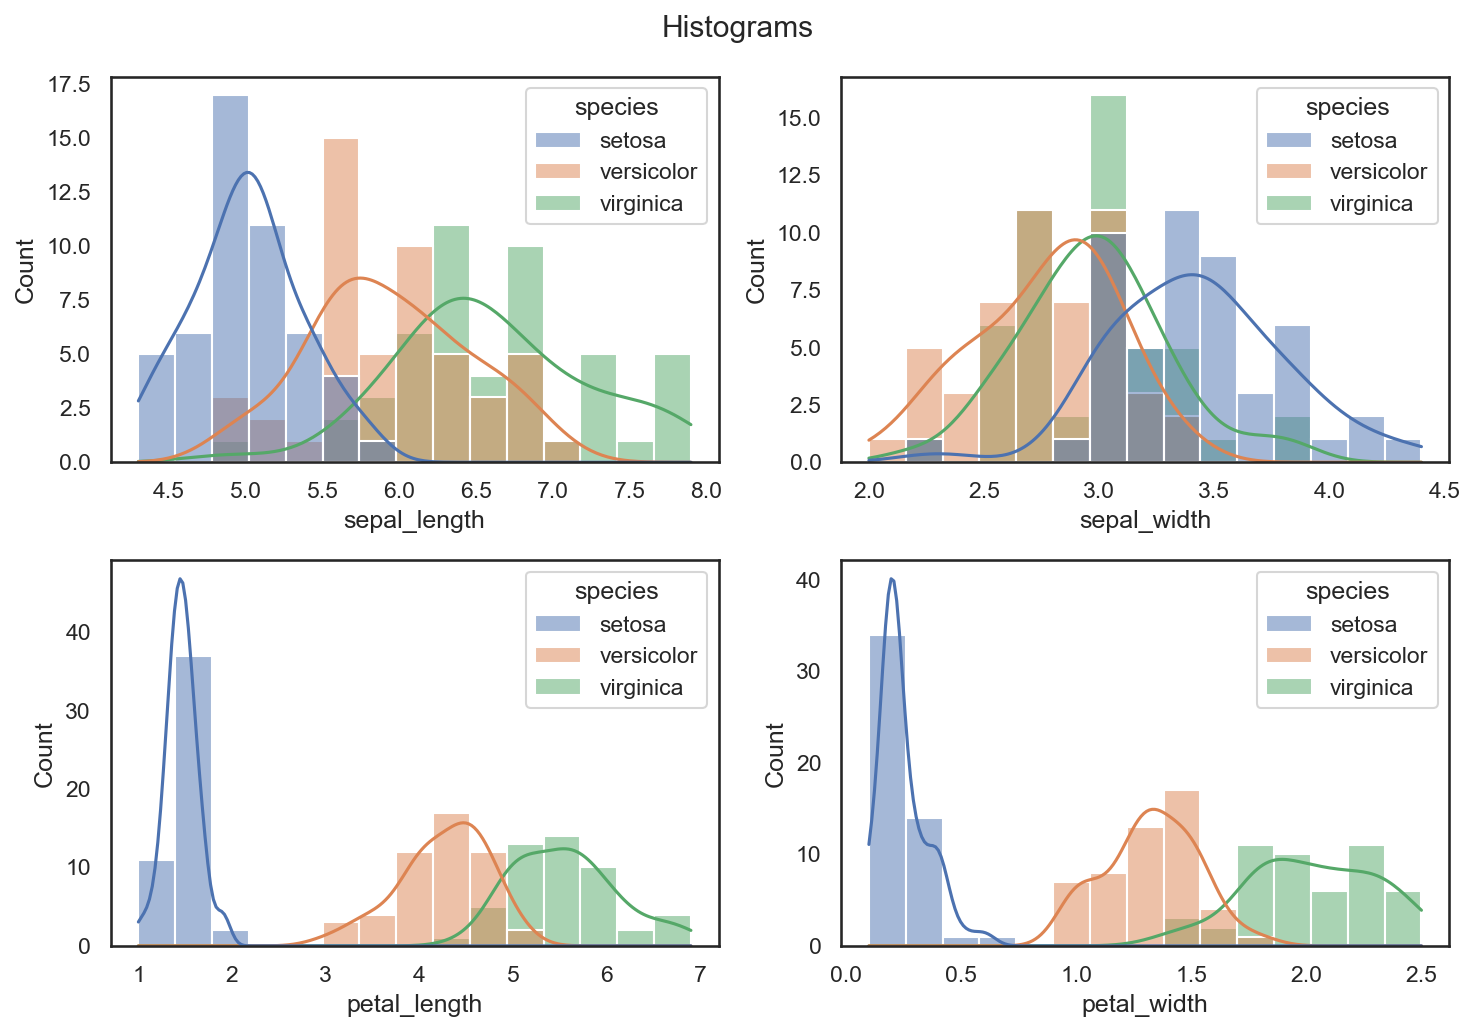

In [25]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.histplot(data = df,x = col,bins = 15,kde=True,hue = 'species')
plt.suptitle('Histograms')
plt.tight_layout()
#plt.savefig("_plots/histogram.jpeg")
plt.show()

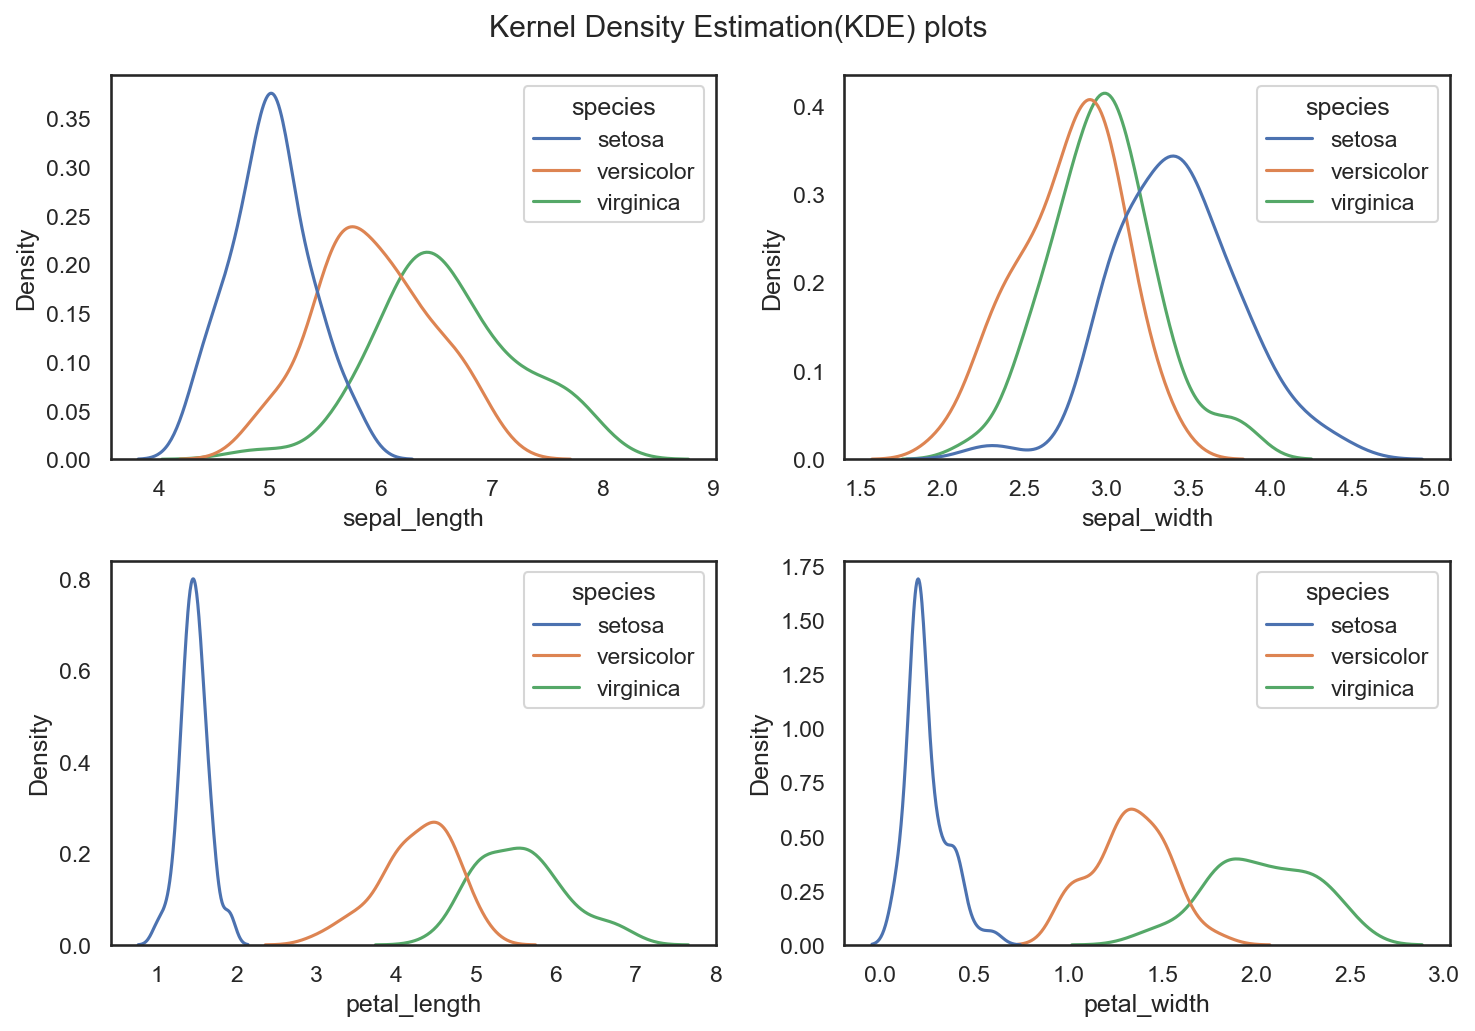

In [26]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.kdeplot(data = df,x = col,hue = 'species')
plt.suptitle('Kernel Density Estimation(KDE) plots')
plt.tight_layout()
#plt.savefig("_plots/kde_plot.jpeg")
plt.show()

<Figure size 960x720 with 0 Axes>

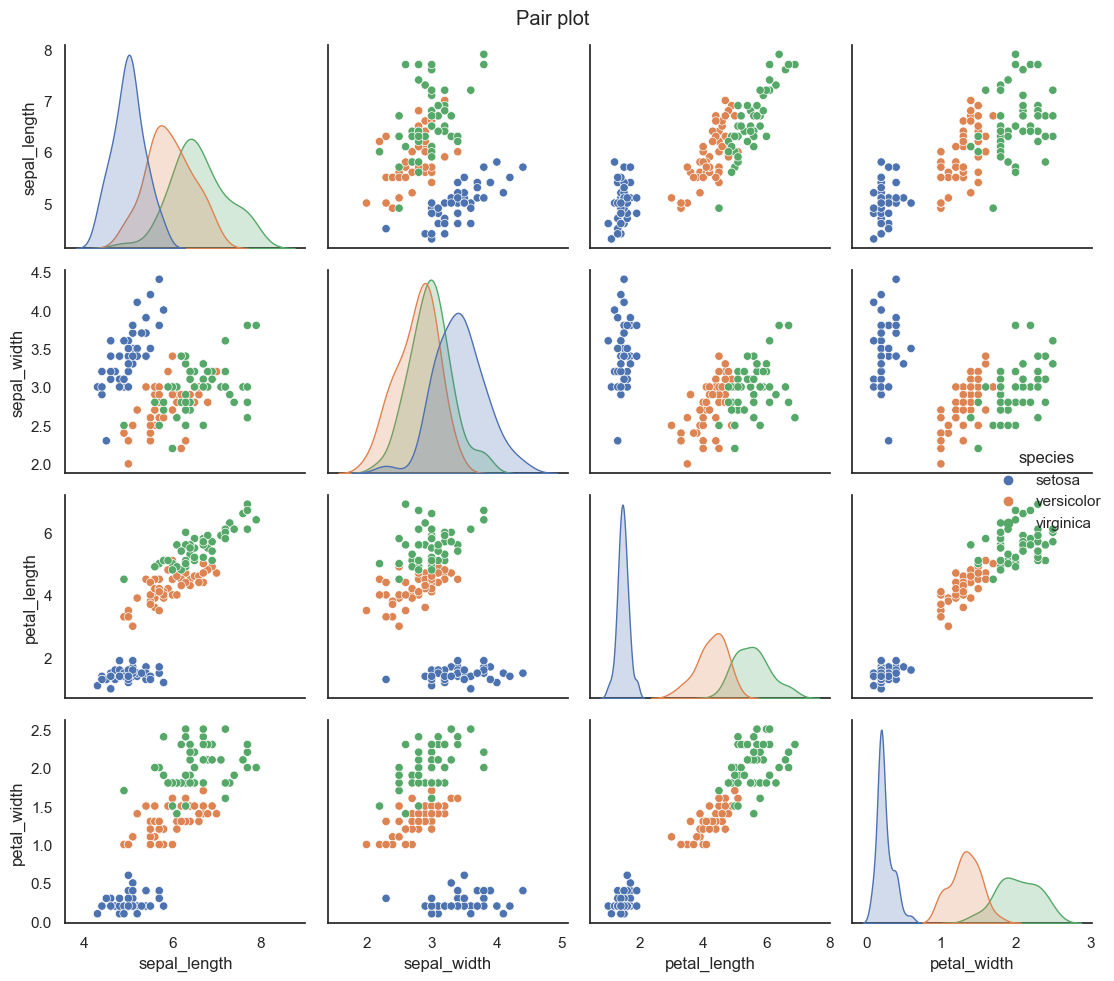

In [27]:
plt.figure(dpi = 150)
sns.pairplot(df,hue = 'species')
plt.suptitle("Pair plot")
plt.tight_layout()
#plt.savefig("_plots/pair_plot.jpeg")
plt.show()

In [28]:
pastel = sns.color_palette('pastel')

In [29]:
pastel

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

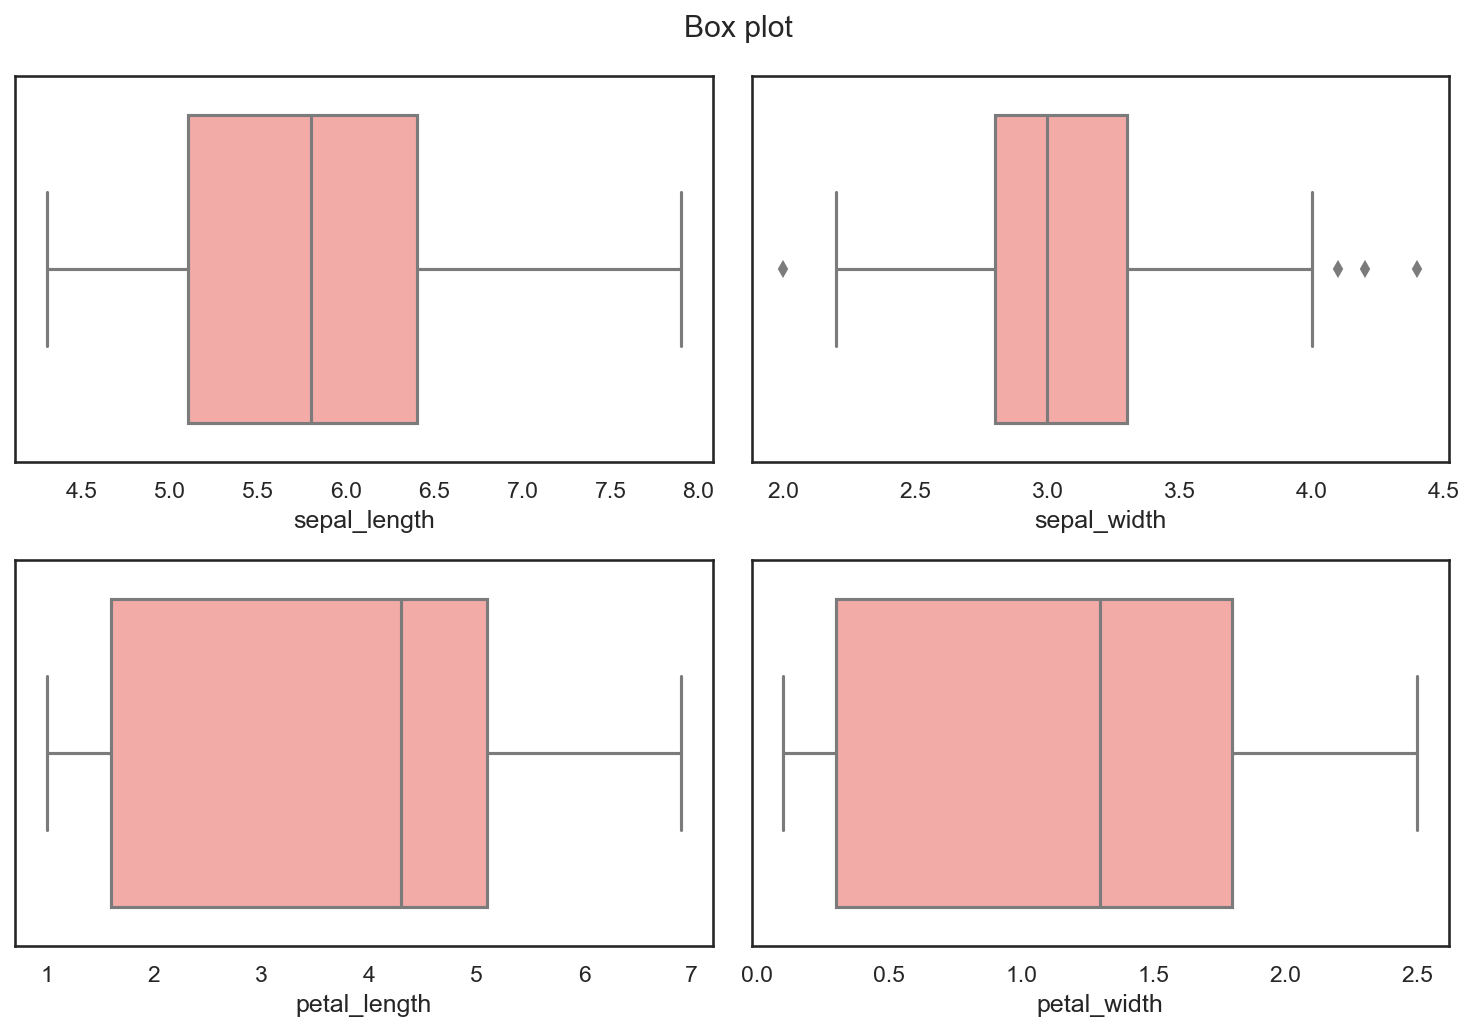

In [30]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start = 1):
    plt.subplot(2,2,num)
    sns.boxplot(data = df,x = col,color=pastel[3])
plt.suptitle('Box plot')
plt.tight_layout()
#plt.savefig("_plots/box_plot.jpeg")
plt.show()

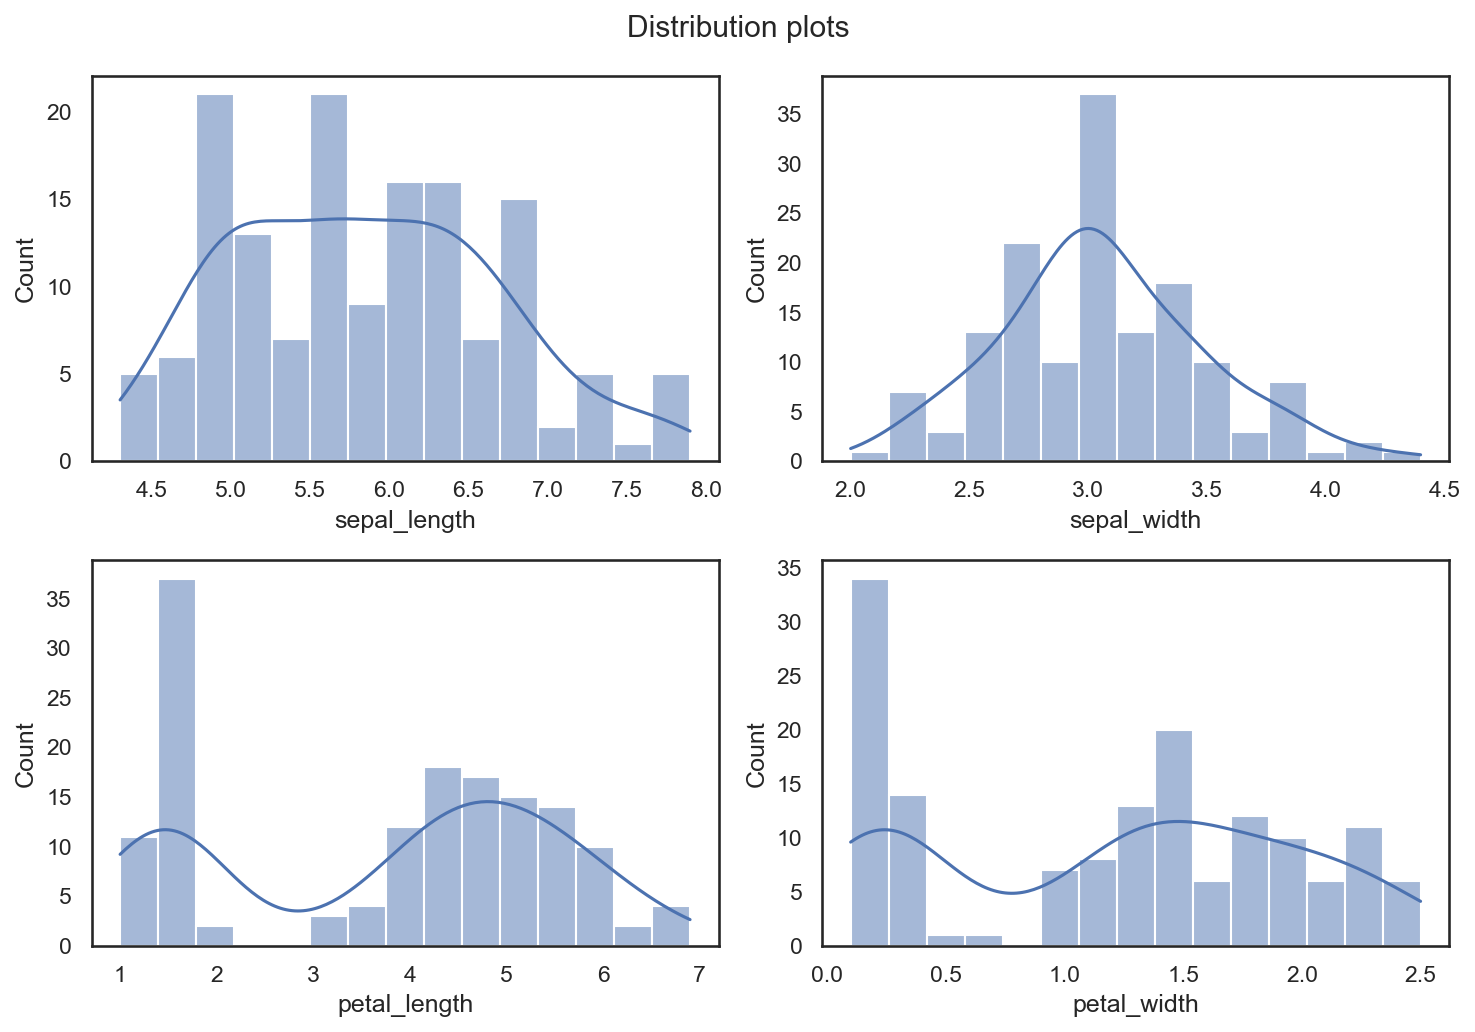

In [31]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.histplot(data = df,x = col,bins = 15,kde=True)
plt.suptitle('Distribution plots')
plt.tight_layout()
#plt.savefig("_plots/dist_plot.jpeg")
plt.show()

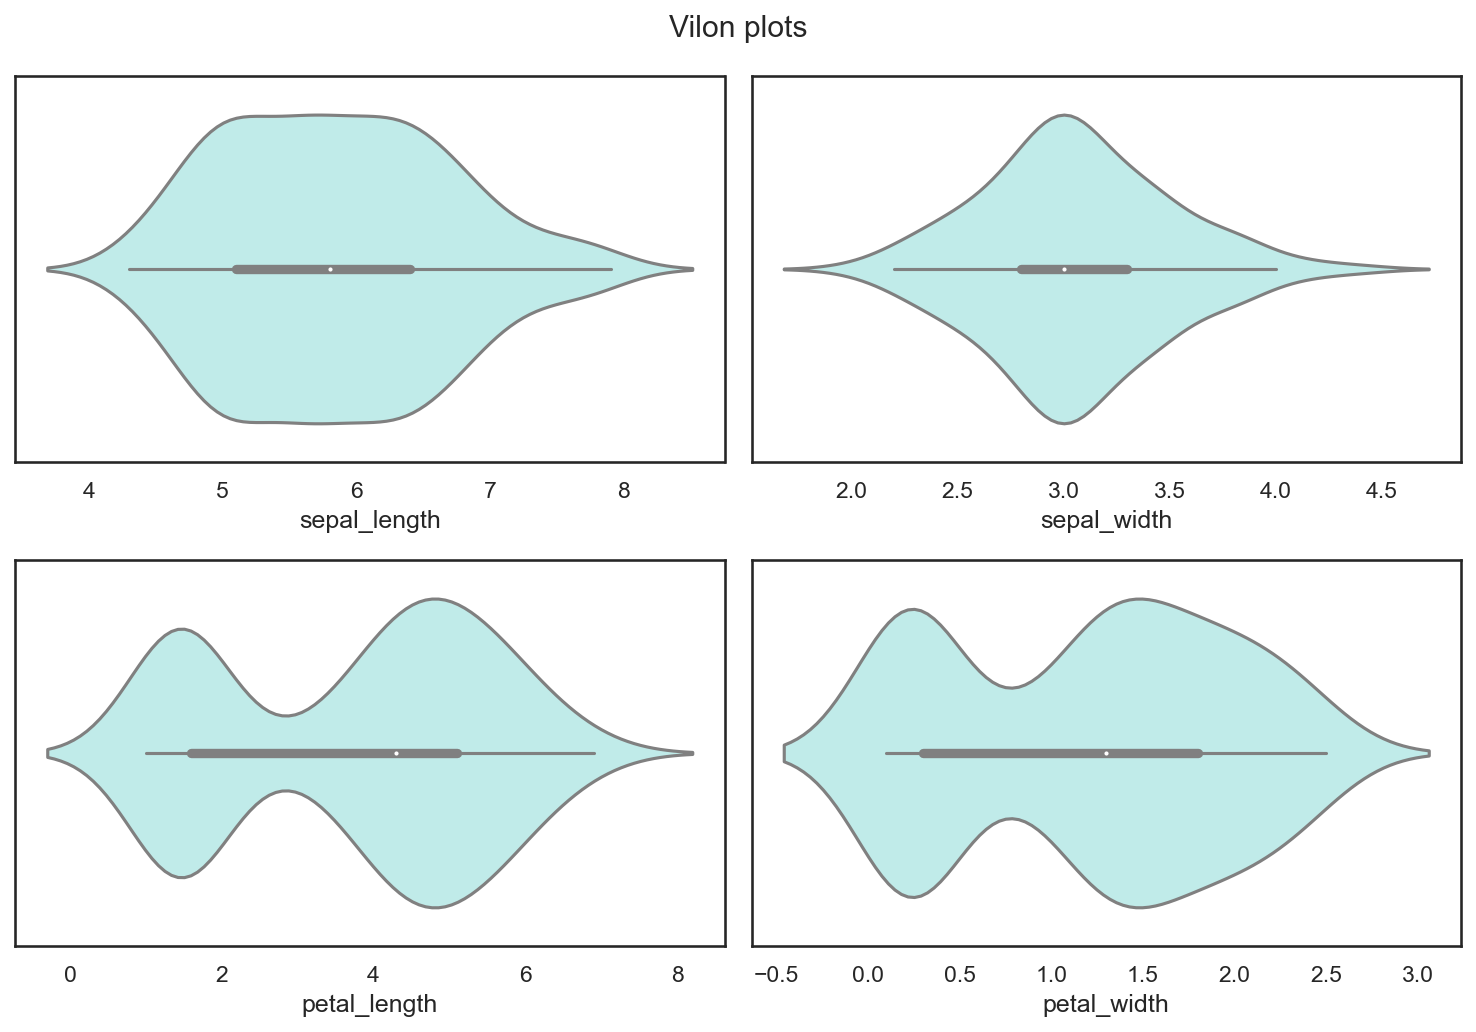

In [32]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.violinplot(data = df,x = col,bins = 15,kde=True,hue = 'species',color=pastel[-1])
plt.suptitle('Vilon plots')
plt.tight_layout()
#plt.savefig("_plots/vilon_plot.jpeg")
plt.show()

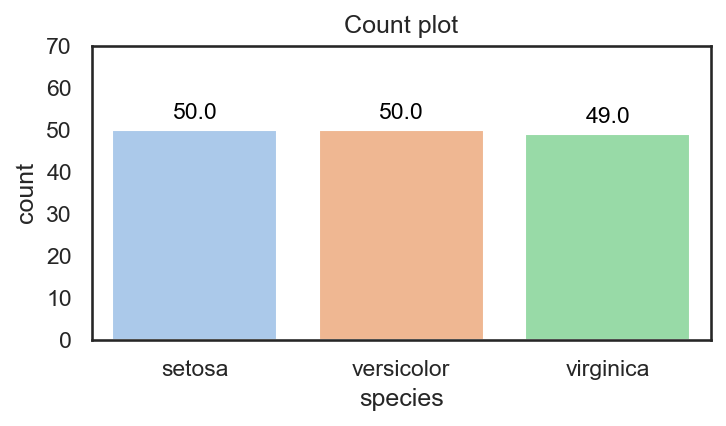

In [33]:
plt.figure(figsize=(5,3),dpi = 150)
ax = sns.countplot(data = df,x = 'species',palette=pastel)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')
plt.yticks([x*10 for x in range(0,8)])
plt.title('Count plot')
plt.tight_layout()
#plt.savefig("_plots/count_plot.jpeg")
plt.show()

In [34]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

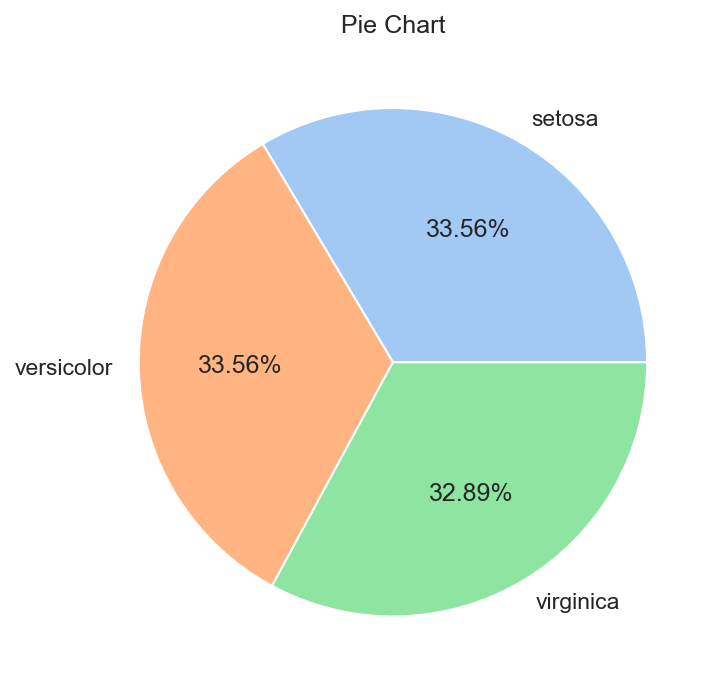

In [35]:
plt.figure(dpi = 150)
plt.pie(df['species'].value_counts(),labels=df['species'].value_counts().keys(),colors=pastel,autopct="%0.2f%%")
plt.title('Pie Chart')
plt.tight_layout()
#plt.savefig("_plots/pie_plot.jpeg")
plt.show()

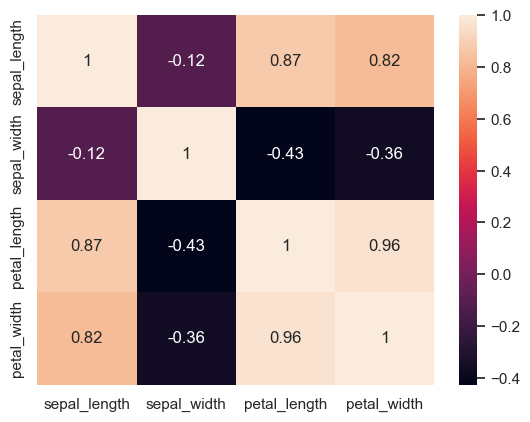

In [36]:
sns.heatmap(df.corr(),annot=True)
#plt.savefig('_plots/heatmap.jpeg')
plt.show()

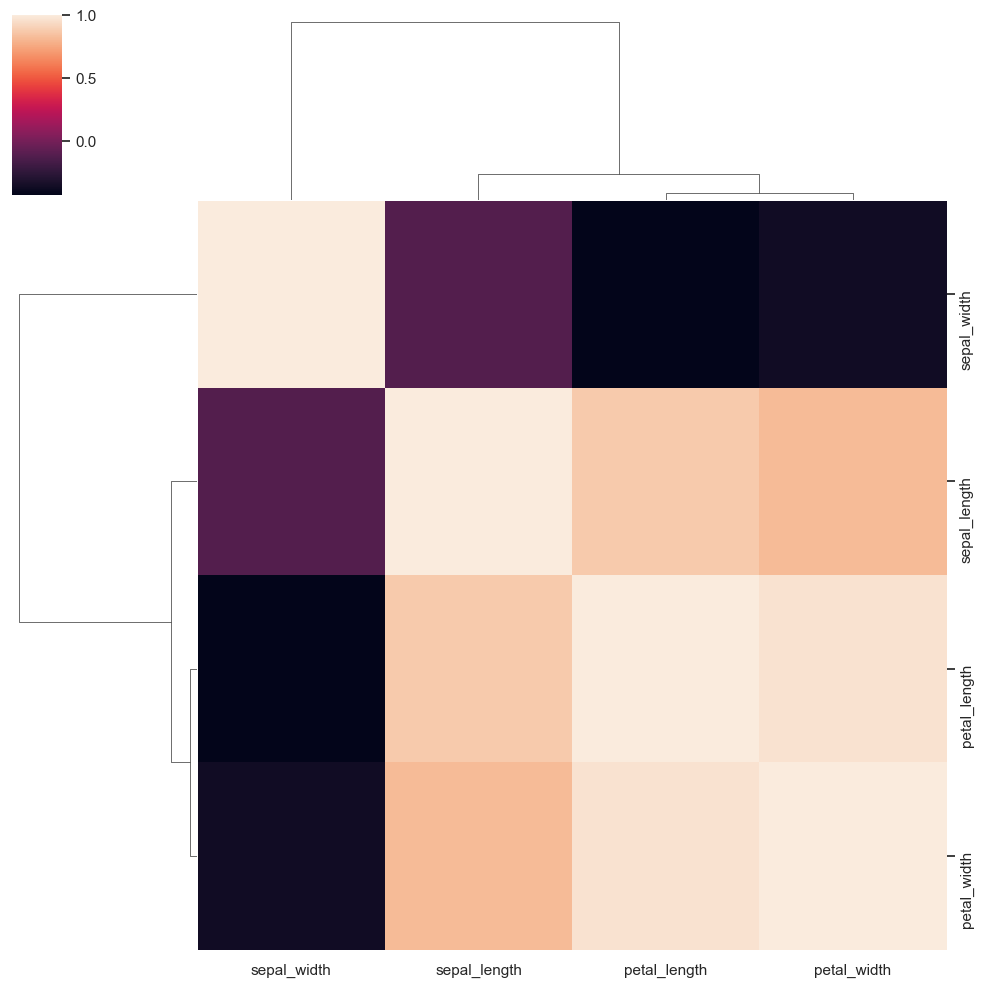

In [37]:
sns.clustermap(df.corr(),)
#plt.savefig('_plots/clustermap.jpeg')
plt.show()

# Data splitting to avoid data leak

In [38]:
X = df.drop(['species'],axis = 1)
y = df['species']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.shape,y_train.shape

((99, 4), (99,))

In [41]:
train = pd.concat([X_train.reset_index(),y_train.reset_index()],axis = 1)

In [42]:
#train.to_csv('_data_setup/train.csv')

In [43]:
X_test.shape,y_test.shape

((50, 4), (50,))

In [44]:
test = pd.concat([X_test.reset_index(),y_test.reset_index()],axis = 1)

In [45]:
#test.to_csv('_data_setup/test.csv')

# Data preperation/preprocessing

# Handling Null values

Available options:
1) Simple imputer
2) KNN inputer

No null values in the data

# Handling Outliers

Available options

1) IQR
2) (mean-3std,mean+3std) (For normal distribution)
3) Quantiles

No outliers from the box plot

# Feature scaling

In [46]:
sc = StandardScaler()

In [47]:
sc.fit(X_train)

StandardScaler()

In [48]:
X_train = pd.DataFrame(sc.transform(X_train),columns=input_col)

In [49]:
X_test = pd.DataFrame(sc.transform(X_test),columns=input_col)

In [50]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.123796,0.017101,0.241765,-3.037022e-16
1,0.856669,0.017101,1.175802,1.367753e+00
2,-0.246354,0.017101,0.416897,4.103259e-01
3,-0.859145,1.226369,-1.392801,-1.367753e+00
4,1.346902,0.258954,0.767161,1.504528e+00


In [51]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.366437,-0.466606,0.533652,-3.037022e-16
1,-0.123796,1.951930,-1.217669,-1.230978e+00
2,2.327367,1.951930,1.701199,1.367753e+00
3,0.243878,-0.224753,0.416897,4.103259e-01
4,1.224344,-0.466606,0.592029,2.735506e-01


In [52]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,-4.934325e-16,-1.981440e-16,8.971499e-18,-2.332590e-16
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-1.839611e+00,-2.401436e+00,-1.567933e+00,-1.504528e+00
25%,-8.591452e-01,-5.875333e-01,-1.276046e+00,-1.230978e+00
50%,-1.237961e-01,1.710076e-02,2.417648e-01,1.367753e-01
75%,6.728320e-01,5.008080e-01,7.671609e-01,8.206518e-01
max,2.327367e+00,2.919344e+00,1.817953e+00,1.778079e+00


In [53]:
X_test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,0.155636,0.481460,-0.064133,-0.021884
std,1.046417,1.089125,1.092494,1.124950
min,-1.717052,-1.917728,-1.626310,-1.504528
25%,-0.675308,-0.224753,-1.334424,-1.230978
50%,0.121320,0.379881,0.387708,0.205163
75%,0.948588,1.165906,0.767161,0.923233
max,2.572484,3.403052,1.701199,1.778079


In [54]:
X_train.skew(numeric_only=True)

sepal_length    0.345416
sepal_width     0.257423
petal_length   -0.330653
petal_width    -0.140778
dtype: float64

In [55]:
X_test.skew(numeric_only=True)

sepal_length    0.248177
sepal_width     0.305999
petal_length   -0.145071
petal_width    -0.010115
dtype: float64

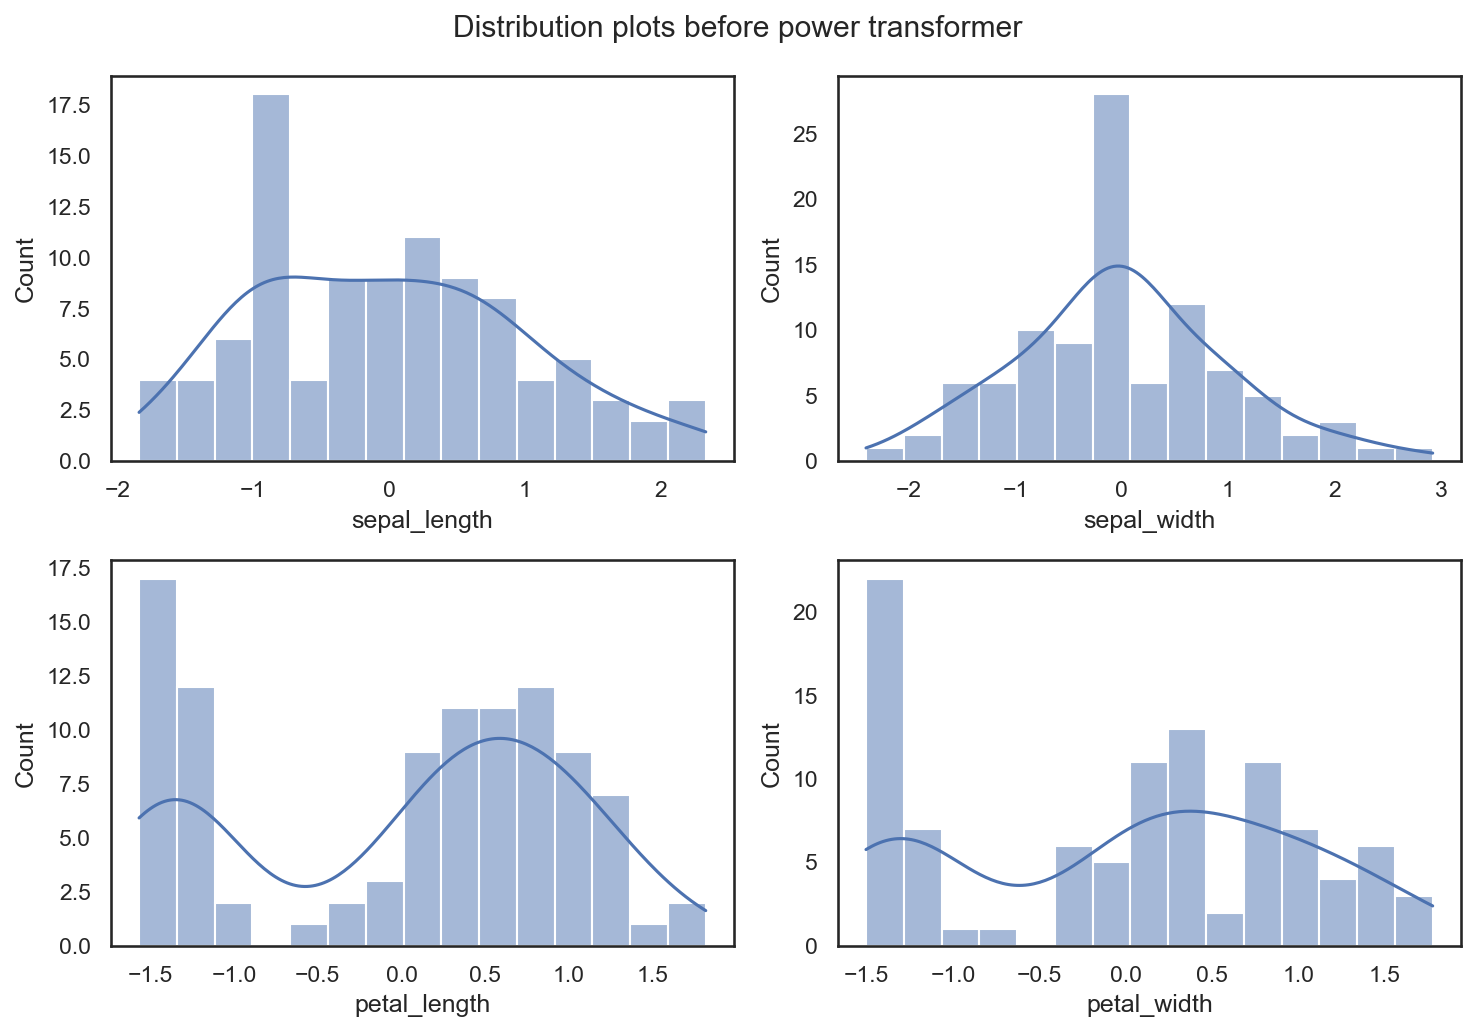

In [56]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.histplot(data = X_train,x = col,bins = 15,kde=True)
plt.suptitle('Distribution plots before power transformer')
plt.tight_layout()
#plt.savefig("_plots/dist_plot_before_pt.jpeg")
plt.show()

# Power Transformer to reduce skewness

In [57]:
ft = PowerTransformer()

In [58]:
ct = ColumnTransformer([('power_transform',ft,['sepal_length','sepal_width','petal_length','petal_width'])],remainder='passthrough')

In [59]:
X_train = pd.DataFrame(ct.fit_transform(X_train),columns=input_col)

In [60]:
X_test = pd.DataFrame(ct.fit_transform(X_test),columns=input_col)

In [61]:
X_train.skew()

sepal_length    0.042895
sepal_width     0.009167
petal_length   -0.028722
petal_width     0.010544
dtype: float64

In [62]:
X_test.skew()

sepal_length    0.031560
sepal_width    -0.005389
petal_length    0.000344
petal_width     0.026990
dtype: float64

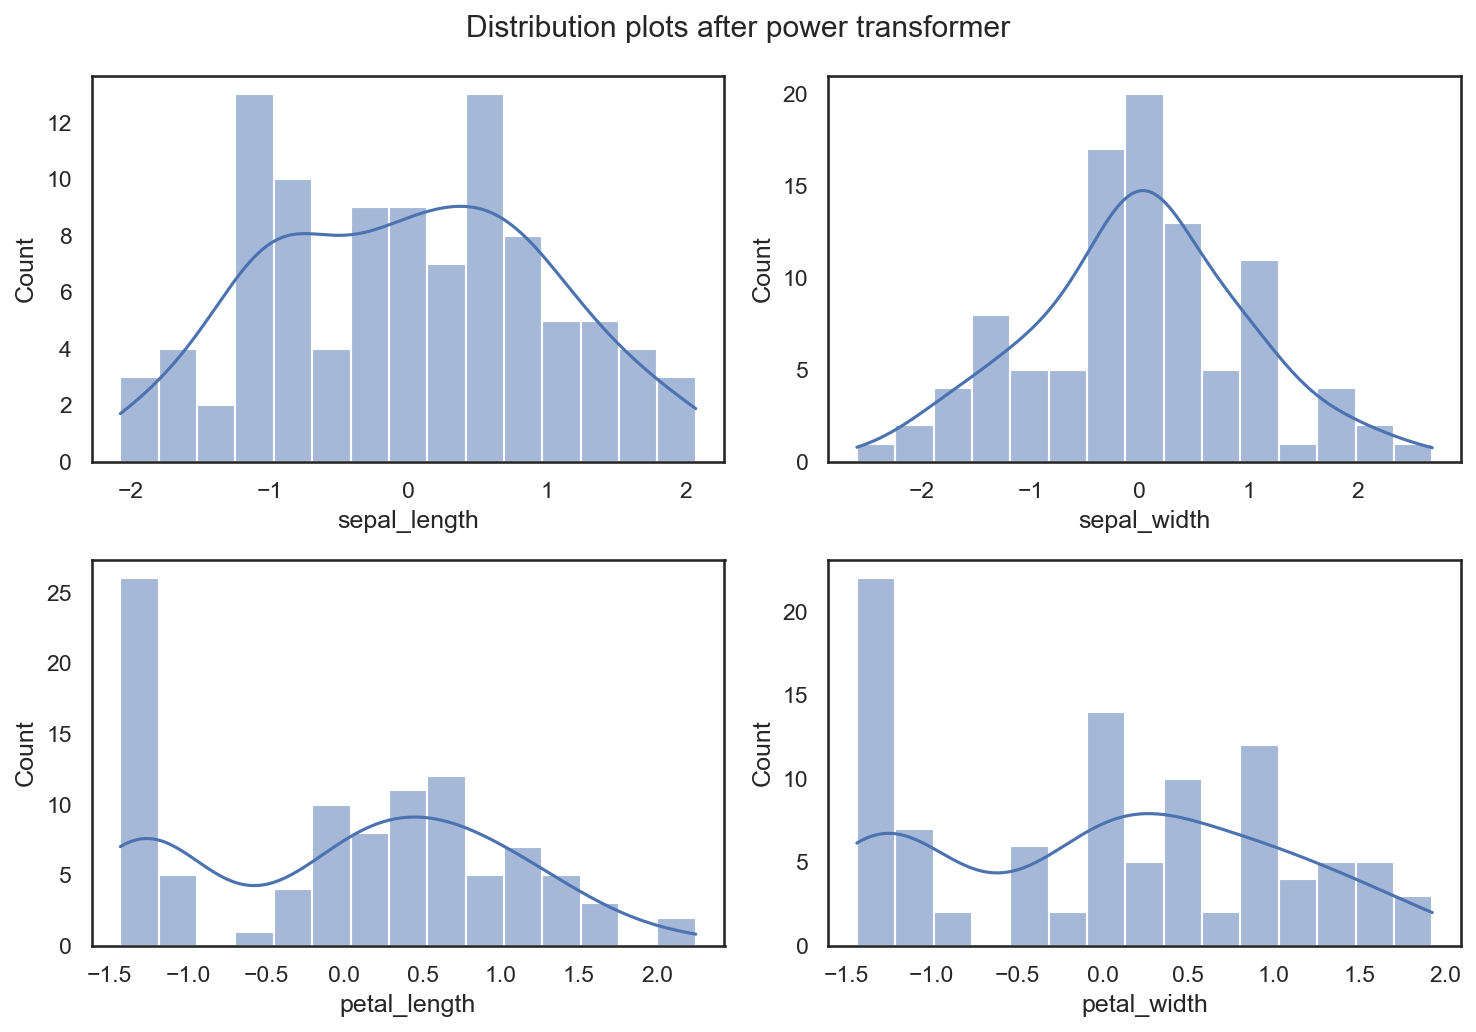

In [63]:
plt.figure(figsize=(10,7),dpi = 150)
for num,col in enumerate(input_col,start=1):
    plt.subplot(2,2,num)
    sns.histplot(data = X_train,x = col,bins = 15,kde=True)
plt.suptitle('Distribution plots after power transformer')
plt.tight_layout()
#plt.savefig("_plots/dist_plot_after_pt.jpeg")
plt.show()

In [64]:
le = LabelEncoder()

In [65]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [66]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Model training/ Hyper parameter tuning

In [67]:
accuracy_dict = {}

# Logistic Regression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train,y_train)

LogisticRegression()

In [70]:
pred = lr.predict(X_test)

In [71]:
accuracy_score(pred,y_test)*100

100.0

In [72]:
lr.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [73]:
cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10).mean()

0.928888888888889

In [74]:
params = {'penalty':['l1', 'l2', 'elasticnet', None],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [75]:
scv_lr = GridSearchCV(lr,param_grid=params,cv = 10)

In [76]:
scv_lr

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
scv_lr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [79]:
scv_lr.best_params_

{'penalty': None, 'solver': 'lbfgs'}

In [80]:
pd.DataFrame(scv_lr.cv_results_).sort_values(['rank_test_score','mean_fit_time']).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
18,0.002205,0.000243,0.00036,0.000009,None,lbfgs,"{'penalty': None, 'solver': 'lbfgs'}",1.0,0.9,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1


In [81]:
pred = scv_lr.predict(X_test)

In [82]:
accuracy_score(y_test,pred)*100

98.0

In [83]:
#with open('_models/logistic_regression.pkl','wb') as file:
#    pickle.dump(scv_lr,file)

In [84]:
accuracy_dict['Logistic Regression'] = accuracy_score(y_test,pred)*100

In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [86]:
confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]])

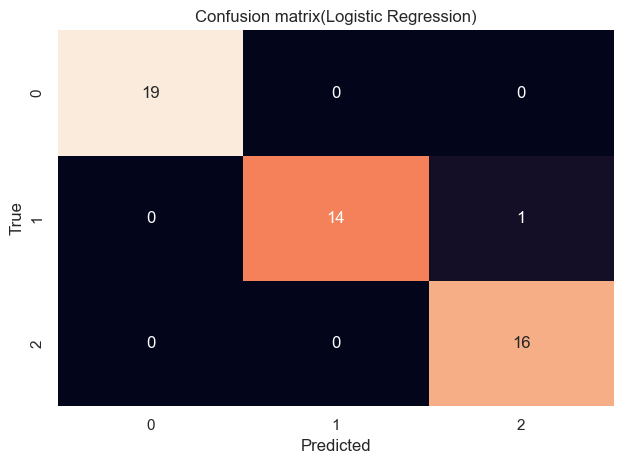

In [87]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(Logistic Regression)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(Logistic Regression).jpeg')
plt.show()

# Gaussian classifier (Naive Bayes)

In [88]:
nb = GaussianNB()

In [89]:
nb.fit(X_train,y_train)

GaussianNB()

In [90]:
pred = nb.predict(X_test)

In [91]:
accuracy_score(y_test,pred)*100

100.0

In [92]:
round(cross_val_score(nb,X_train,y_train,scoring='accuracy',cv = 10).mean()*100,2)

93.89

In [93]:
accuracy_dict['Gaussian Classifier'] = round(cross_val_score(nb,X_train,y_train,scoring='accuracy',cv = 10).mean()*100,2)

In [94]:
#with open('_models/gaussian_classifier.pkl','wb') as file:
#    pickle.dump(nb,file)

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [96]:
confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

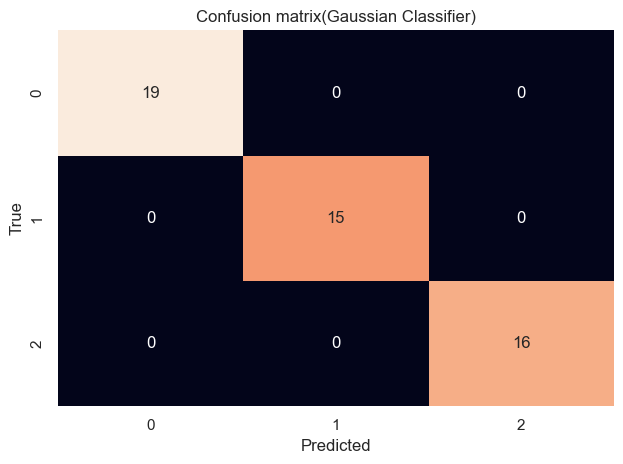

In [97]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(Gaussian Classifier)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(Gaussian Classifier).jpeg')
plt.show()

# KNearest Neighbours classifier (KNN)

In [98]:
knn = KNeighborsClassifier()

In [99]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
pred = knn.predict(X_test)

In [101]:
accuracy_score(y_test,pred)*100

100.0

In [102]:
round(cross_val_score(knn,X_train,y_train,scoring='accuracy',cv = 10).mean()*100,2)

93.89

In [103]:
params = {'n_neighbors' : [i for i in range(1,11)],
          'weights' : ['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size' : [x*10 for x in range(1,6)],
         'p' : [1,2]}

In [104]:
scv_knn = GridSearchCV(knn,param_grid=params,cv = 10)

In [105]:
scv_knn

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [106]:
scv_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [107]:
scv_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [108]:
pd.DataFrame(scv_knn.cv_results_).sort_values(['rank_test_score','mean_fit_time']).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
179,0.000393,0.000002,0.000458,0.000004,auto,50,5,2,distance,"{'algorithm': 'auto', 'leaf_size': 50, 'n_neig...",...,0.7,0.9,1.0,1.0,1.0,0.9,0.888889,0.938889,0.092195,1
139,0.000394,0.000004,0.000457,0.000004,auto,40,5,2,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",...,0.7,0.9,1.0,1.0,1.0,0.9,0.888889,0.938889,0.092195,1
138,0.000395,0.000003,0.000529,0.000017,auto,40,5,2,uniform,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",...,0.8,0.9,1.0,1.0,1.0,0.9,0.888889,0.938889,0.067082,1
178,0.000395,0.000004,0.000526,0.000018,auto,50,5,2,uniform,"{'algorithm': 'auto', 'leaf_size': 50, 'n_neig...",...,0.8,0.9,1.0,1.0,1.0,0.9,0.888889,0.938889,0.067082,1


In [109]:
pred = scv_knn.predict(X_test)

In [110]:
accuracy_score(y_test,pred)*100

100.0

In [111]:
accuracy_dict['KNN'] = accuracy_score(y_test,pred)*100

In [112]:
#with open('_models/knn_classifier.pkl','wb') as file:
#    pickle.dump(scv_knn,file)

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [114]:
confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

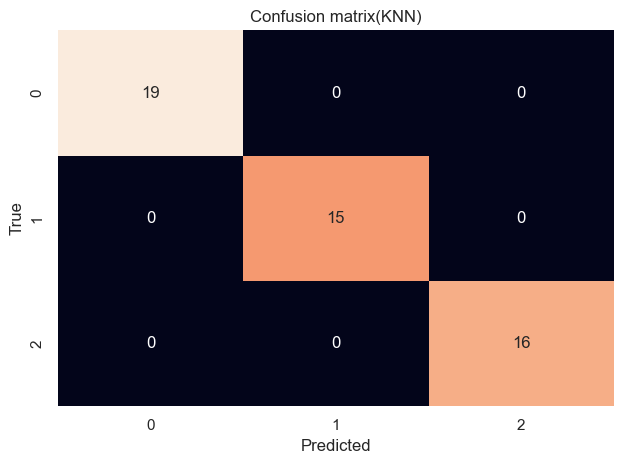

In [115]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(KNN)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(KNN).jpeg')
plt.show()

# Support Vector Machine classifier (SVC)

In [116]:
svm = SVC()

In [117]:
svm.fit(X_train,y_train)

SVC()

In [118]:
pred = svm.predict(X_test)

In [119]:
accuracy_score(y_test,pred)*100

100.0

In [120]:
round(cross_val_score(svm,X_train,y_train,cv = 10,scoring='accuracy').mean()*100,2)

91.89

In [121]:
params = {'kernel' : ['linear', 'poly',' sigmoid','rbf'],
         'degree' : [x for x in range(1,6)],
         'gamma' : ['scale', 'auto'],}

In [122]:
scv_svm = GridSearchCV(svm,param_grid=params,scoring='accuracy',cv = 10)

In [123]:
scv_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', ' sigmoid', 'rbf']},
             scoring='accuracy')

In [124]:
scv_svm.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [125]:
pd.DataFrame(scv_svm.cv_results_).sort_values(['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000726,0.000155,0.000449,0.000086,1,scale,linear,"{'degree': 1, 'gamma': 'scale', 'kernel': 'lin...",1.0,1.0,...,0.7,0.9,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1
36,0.000515,0.000008,0.000334,0.000002,5,auto,linear,"{'degree': 5, 'gamma': 'auto', 'kernel': 'line...",1.0,1.0,...,0.7,0.9,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1
4,0.000659,0.000102,0.000413,0.000051,1,auto,linear,"{'degree': 1, 'gamma': 'auto', 'kernel': 'line...",1.0,1.0,...,0.7,0.9,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1
32,0.000524,0.000004,0.000336,0.000004,5,scale,linear,"{'degree': 5, 'gamma': 'scale', 'kernel': 'lin...",1.0,1.0,...,0.7,0.9,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1
8,0.000558,0.000017,0.000363,0.000016,2,scale,linear,"{'degree': 2, 'gamma': 'scale', 'kernel': 'lin...",1.0,1.0,...,0.7,0.9,1.0,1.0,1.0,1.0,1.0,0.96,0.091652,1


In [126]:
pred = scv_svm.predict(X_test)

In [127]:
accuracy_score(y_test,pred)*100

98.0

In [128]:
accuracy_dict['SVM'] = accuracy_score(y_test,pred)*100

In [129]:
#with open('_models/svm_classifier.pkl','wb') as file:
#    pickle.dump(scv_svm,file)

In [130]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



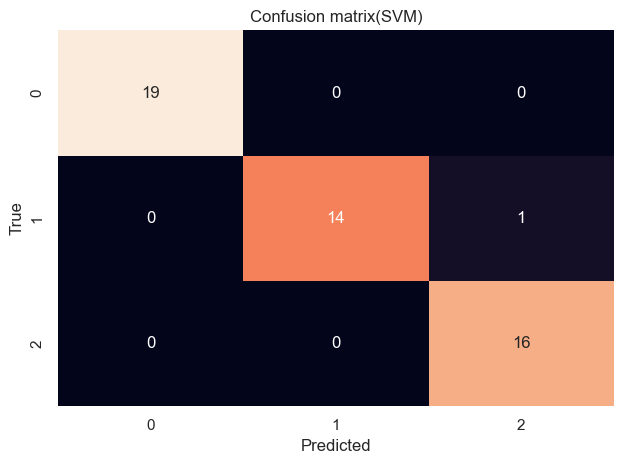

In [131]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(SVM)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(SVM).jpeg')
plt.show()

# Decision Tree classifier

In [132]:
dt = DecisionTreeClassifier()

In [133]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [134]:
pred = dt.predict(X_test)

In [135]:
accuracy_score(y_test,pred)*100

100.0

In [136]:
round(cross_val_score(dt,X_train,y_train,scoring='accuracy',cv = 10).mean()*100,2)

90.89

In [137]:
params = {'criterion' : ["gini", "entropy", "log_loss"],
          'splitter' : ["best", "random"],}

In [138]:
scv_dt = GridSearchCV(dt,param_grid=params,cv = 10,scoring='accuracy')

In [139]:
scv_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [140]:
scv_dt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [141]:
pd.DataFrame(scv_dt.cv_results_).sort_values(['rank_test_score']).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.000518,0.000043,0.000387,0.000090,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.9,0.9,0.9,0.7,0.9,1.0,1.0,0.9,1.0,0.888889,0.908889,0.083267,1
3,0.000486,0.000066,0.000347,0.000018,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",1.0,0.8,0.9,0.5,0.9,0.9,1.0,1.0,1.0,1.000000,0.900000,0.148324,2
0,0.000644,0.000187,0.000417,0.000113,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",1.0,0.9,0.9,0.7,0.9,1.0,1.0,0.8,0.9,0.888889,0.898889,0.089505,3
4,0.000509,0.000054,0.000369,0.000091,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.9,0.9,0.9,0.7,0.9,1.0,1.0,0.8,1.0,0.777778,0.887778,0.096667,4


In [142]:
pred = scv_dt.predict(X_test)

In [143]:
accuracy_score(y_test,pred)*100

94.0

In [144]:
accuracy_dict['Decision Tree'] = accuracy_score(y_test,pred)*100

In [145]:
#with open('_models/dt_classifier.pkl','wb') as file:
#    pickle.dump(scv_dt,file)

In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



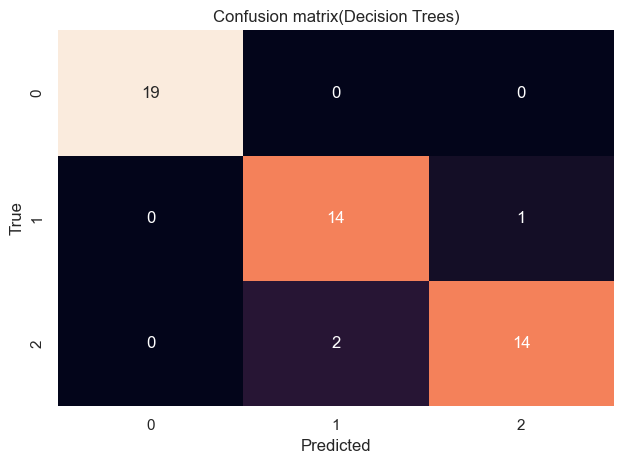

In [147]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(Decision Trees)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(Decision Trees).jpeg')
plt.show()

# Random Forests classifier

In [148]:
rf = RandomForestClassifier()

In [149]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [150]:
pred = rf.predict(X_test)

In [151]:
accuracy_score(y_test,pred)*100

100.0

In [152]:
round(cross_val_score(rf,X_train,y_train,cv = 10,scoring='accuracy').mean()*10,2)

9.19

In [153]:
accuracy_dict['Random Forest'] = accuracy_score(y_test,pred)*100

In [154]:
#with open('_models/rf_classifier.pkl','wb') as file:
#    pickle.dump(rf,file)

In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



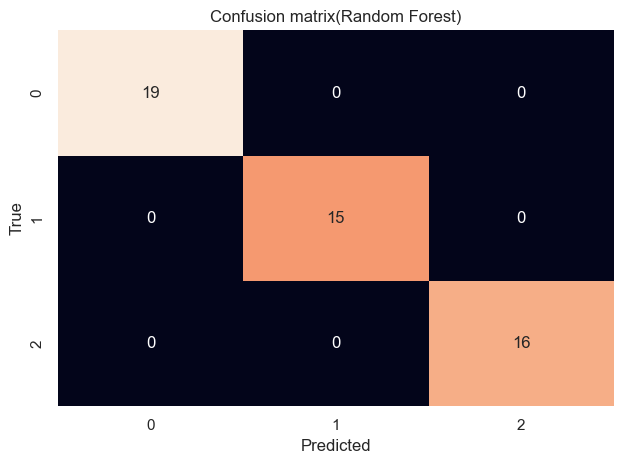

In [156]:
plt.figure(dpi = 100)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(Random Forest)")
plt.tight_layout()
#plt.savefig('_plots/Confusion_matrix(Random Forest).jpeg')
plt.show()

# Principal Component Analysis

In [157]:
from sklearn.decomposition import PCA

In [158]:
pca = PCA(n_components=2)

In [159]:
arr = pca.fit_transform(X_train)

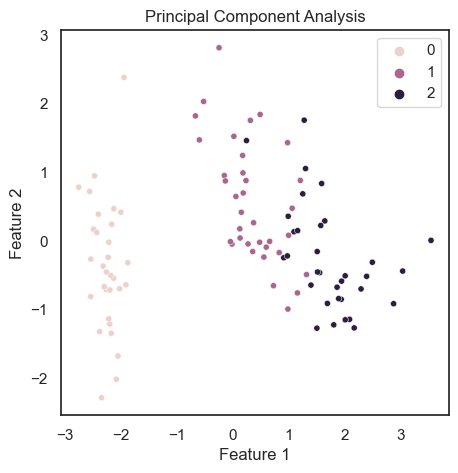

In [160]:
plt.figure(figsize=(5,5),dpi = 100)
sns.scatterplot(x = arr[:,0],y = arr[:,1],hue = y_train,s = 20,markers='*')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Principal Component Analysis')
#plt.savefig('_plots/PCA.jpeg')
plt.show()

# Deep learning

In [161]:
import torch
from torch import nn

In [162]:
X_train = torch.tensor(np.array(X_train)).type(torch.float)

In [163]:
X_test = torch.tensor(np.array(X_test)).type(torch.float)

In [164]:
X_train.shape,X_test.shape

(torch.Size([99, 4]), torch.Size([50, 4]))

In [165]:
X_train.dtype,X_test.dtype

(torch.float32, torch.float32)

In [166]:
y_train = torch.tensor(np.array(y_train)).type(torch.long)
y_test = torch.tensor(np.array(y_test)).type(torch.long)

In [167]:
class Iris_Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=4,out_features=10),
                                                nn.ReLU(),
                                                nn.Linear(in_features=10,out_features=15),
                                                nn.ReLU(),
                                                nn.Linear(in_features=15,out_features=10),
                                                nn.ReLU(),
                                                nn.Linear(in_features=10,out_features=3))
    
    def forward(self,X):
        return self.deep_neural_network(X)

In [168]:
model = Iris_Classifier()

In [169]:
model.state_dict

<bound method Module.state_dict of Iris_Classifier(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=3, bias=True)
  )
)>

In [170]:
model.named_parameters

<bound method Module.named_parameters of Iris_Classifier(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=3, bias=True)
  )
)>

In [171]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr = 0.001)

In [172]:
model.eval()
with torch.inference_mode():
    logits = model(X_train)

In [173]:
pred = logits.softmax(dim = 1).argmax(dim = 1)

In [174]:
accuracy_score(y_train,pred)*100

31.313131313131315

In [175]:
epochs = 1000
training_acc_lst = []
testing_acc_lst = []
counter = 0
patience = 100
best_accuracy = 0

for epoch in range(epochs):
    
    model.train()
    
    logits = model(X_train)
    
    loss = lossfn(logits,y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    accuracy_train = accuracy_score(y_train,pred.detach())*100
    
    training_acc_lst.append(accuracy_train)
    
    model.eval()
    with torch.inference_mode():
        logits = model(X_test)
    
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    accuracy_test = accuracy_score(y_test,pred)*100
    
    testing_acc_lst.append(accuracy_test)
    
    if best_accuracy < testing_acc_lst[-1]:
        best_accuracy = testing_acc_lst[-1]
        counter = 0
    else:
        counter += 1
        
    if counter == patience:
        print(f"Epoch : {epoch}, Training accuracy : {training_acc_lst[-1]:0.2f}, Testing accuracy : {testing_acc_lst[-1]:0.2f}")
        break
        
    if epoch%25 == 0:
        print(f"Epoch : {epoch}, Training accuracy : {training_acc_lst[-1]:0.2f}, Testing accuracy : {testing_acc_lst[-1]:0.2f}")
        

Epoch : 0, Training accuracy : 31.31, Testing accuracy : 38.00
Epoch : 25, Training accuracy : 44.44, Testing accuracy : 44.00
Epoch : 50, Training accuracy : 61.62, Testing accuracy : 58.00
Epoch : 75, Training accuracy : 69.70, Testing accuracy : 72.00
Epoch : 100, Training accuracy : 75.76, Testing accuracy : 84.00
Epoch : 125, Training accuracy : 88.89, Testing accuracy : 88.00
Epoch : 150, Training accuracy : 89.90, Testing accuracy : 90.00
Epoch : 175, Training accuracy : 93.94, Testing accuracy : 96.00
Epoch : 200, Training accuracy : 93.94, Testing accuracy : 98.00
Epoch : 225, Training accuracy : 95.96, Testing accuracy : 100.00
Epoch : 250, Training accuracy : 95.96, Testing accuracy : 100.00
Epoch : 275, Training accuracy : 96.97, Testing accuracy : 100.00
Epoch : 300, Training accuracy : 97.98, Testing accuracy : 100.00
Epoch : 302, Training accuracy : 97.98, Testing accuracy : 100.00


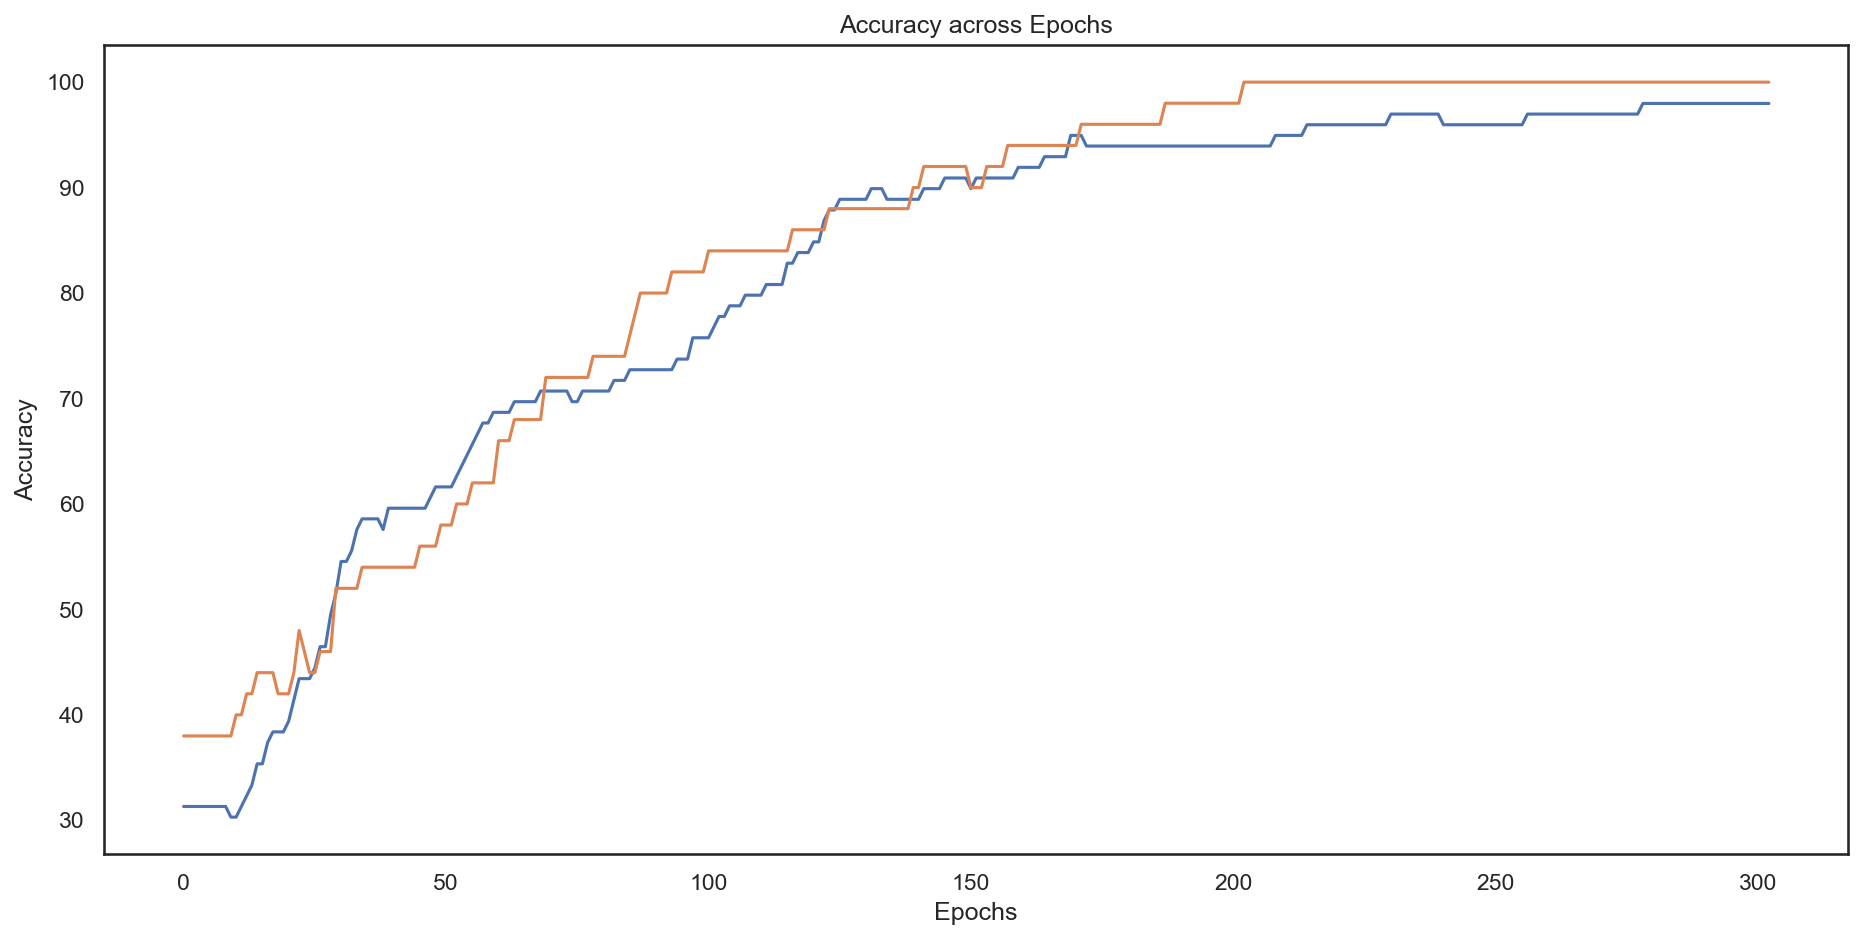

In [176]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(epoch+1),y = training_acc_lst)
sns.lineplot(x = range(epoch+1),y = testing_acc_lst)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy across Epochs")
#plt.savefig('_plots/acurracy_epochs.jpeg')
plt.show()

In [177]:
with torch.inference_mode():
    logits = model(X_test)

In [178]:
pred = logits.softmax(dim = 1).argmax(dim = 1)

In [179]:
accuracy_score(y_test,pred)*100

100.0

In [180]:
#torch.save(model, '_models/DL_model.pt')